In [39]:
#Objectives
#Perform EDA(Exploratory Data Analysis) on Brazillian E-Commerce Dataset by Olist obtained from Kaggle to understand sales trend, customer behaviour, etc.

In [40]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
DB_PATH = "../retail_sales_analytics.db"
conn = sqlite3.connect(DB_PATH)

In [42]:
#Monthly Revenue
query = """
SELECT
    STRFTIME('%Y-%m', o.order_purchase_timestamp) AS month,
    SUM(p.payment_value) AS revenue
FROM orders o
JOIN payments p ON o.order_id = p.order_id
GROUP BY month
ORDER BY month;
"""
df_rev = pd.read_sql_query(query, conn)

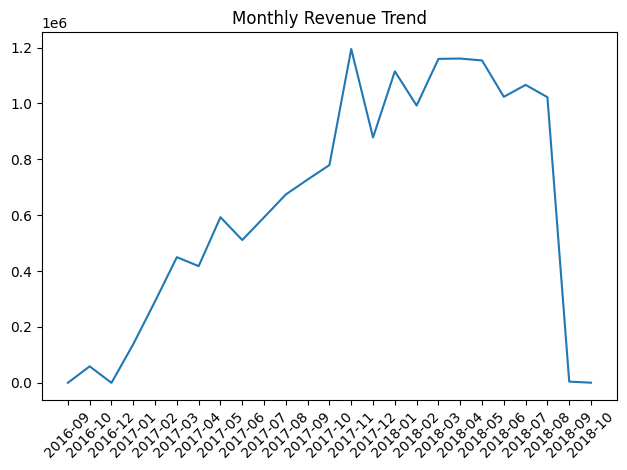

In [43]:
plt.figure()
plt.plot(df_rev["month"], df_rev["revenue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.savefig("../visuals/monthly_revenue_trend.png")
plt.show()

In [44]:
#Revenue shows strong seasonability with a peak in October 2017

In [45]:
#Monthly Order Volume
query = """
SELECT
    STRFTIME('%Y-%m', order_purchase_timestamp) AS month,
    COUNT(order_id) AS orders
FROM orders
GROUP BY month
ORDER BY month;
"""
df_orders = pd.read_sql_query(query, conn)

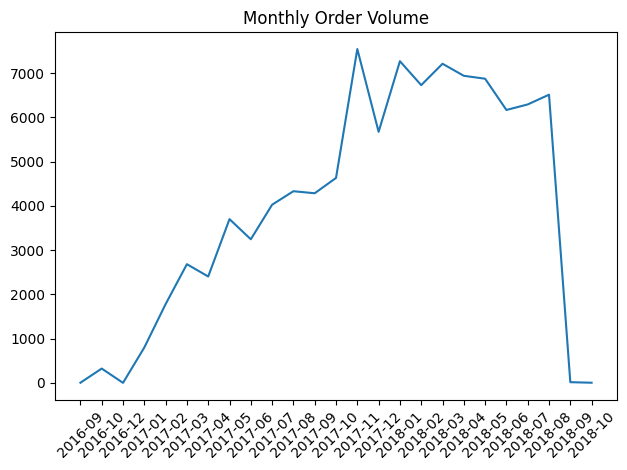

In [46]:
plt.figure()
plt.plot(df_orders["month"], df_orders["orders"])
plt.xticks(rotation=45)
plt.title("Monthly Order Volume")
plt.tight_layout()
plt.savefig("../visuals/monthly_order_volume.png")
plt.show()

In [47]:
#Revenue by payment
query = """
SELECT
    payment_type,
    SUM(payment_value) AS revenue
FROM payments
GROUP BY payment_type
ORDER BY revenue DESC;
"""
df_pay = pd.read_sql_query(query, conn)

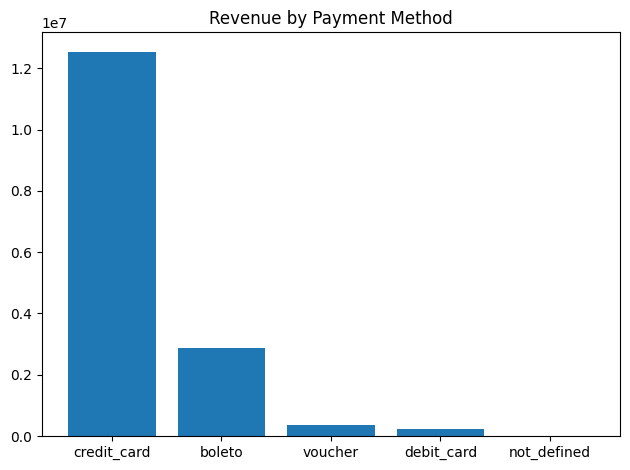

In [48]:
plt.figure()
plt.bar(df_pay["payment_type"], df_pay["revenue"])
plt.title("Revenue by Payment Method")
plt.tight_layout()
plt.savefig("../visuals/revenue_by_payment_method.png")
plt.show()

In [49]:
#Top Product Categories
query = """
SELECT
    pr.product_category_name,
    SUM(oi.price) AS revenue
FROM order_items oi
JOIN products pr ON oi.product_id = pr.product_id
GROUP BY pr.product_category_name
ORDER BY revenue DESC
LIMIT 10;
"""
df_prod = pd.read_sql_query(query, conn)

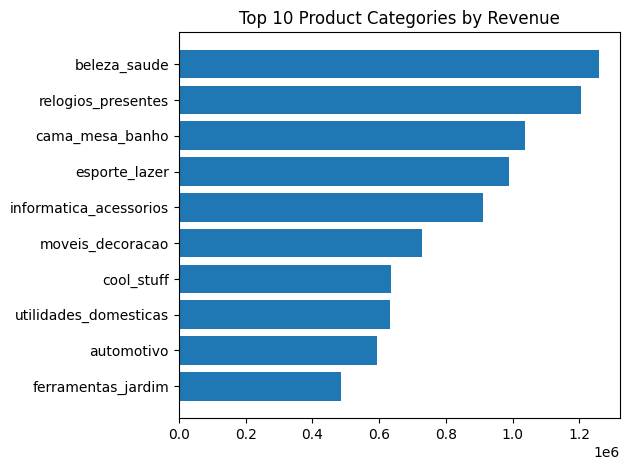

In [50]:
plt.figure()
plt.barh(df_prod["product_category_name"], df_prod["revenue"])
plt.gca().invert_yaxis()
plt.title("Top 10 Product Categories by Revenue")
plt.tight_layout()
plt.savefig("../visuals/top_product_categories.png")
plt.show()

In [51]:
#beleza_saude depicts beauty and health. Therefore, beauty and health is the highest revenue generating category.

In [52]:
#Customer Distribution (by state)
query = """
SELECT
    customer_state,
    COUNT(DISTINCT customer_unique_id) AS customers
FROM customers
GROUP BY customer_state
ORDER BY customers DESC
LIMIT 10;
"""
df_state = pd.read_sql_query(query, conn)

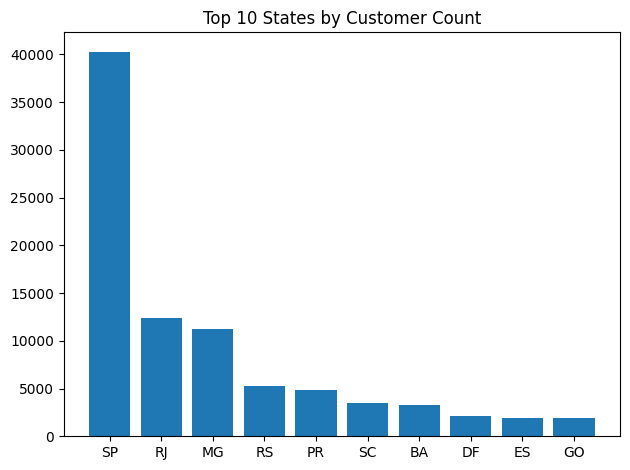

In [53]:
plt.figure()
plt.bar(df_state["customer_state"], df_state["customers"])
plt.title("Top 10 States by Customer Count")
plt.tight_layout()
plt.savefig("../visuals/customer_distribution_by_state.png")
plt.show()

In [54]:
#sao-paulo has the largest customer base, indicating very strong customer concentration